In [1]:
from pathlib import Path

import io

from IPython import display

import msprime
import tskit

In [2]:
SAVE_PATH = Path('../trees')
SAVE_PATH.mkdir(exist_ok=True)

## Case 1

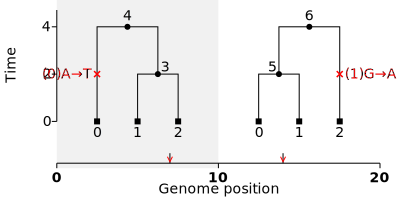

In [3]:
nodes = """\
is_sample time
1         0
1         0
1         0
0         2
0         4
0         2
0         4
"""

edges = """\
left right parent child
0    10    4      0,3
0    10    3      1,2
10   20    5      0,1
10   20    6      2,5
"""

sites = """\
position ancestral_state
7        A
14       G
"""

mutations = """\
site node parent derived_state
0    0    -1     T
1    2    -1     A
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case1.tree')
display.display(display.Markdown('## Case 1'))
ts.draw_svg(
    y_axis=True,
    mutation_labels=mut_labels
)

## Case 2

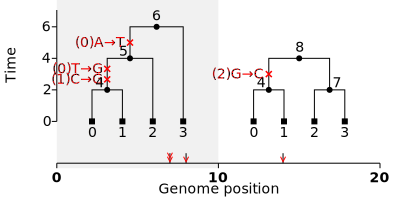

In [4]:
nodes = """\
is_sample time
1         0
1         0
1         0
1         0
0         2
0         4
0         6
0         2
0         4
"""

edges = """\
left right parent child
0    10    4      0,1
0    10    5      2,4
0    10    6      3,5
10   20    4      0,1
10   20    7      2,3
10   20    8      4,7
"""

sites = """\
position ancestral_state
7        A
8        C
14       G
"""

# # this is what's on disk
# mutations = """\
# site node parent derived_state
# 0    5    -1     T
# 1    4    -1     G
# 2    7    -1     C
# # """
# mutations = """\
# site node parent derived_state
# 0    5    -1     T
# 1    4    -1     G
# 2    4    -1     C
# """

mutations = """\
site node parent derived_state
0    5    -1     T
0    4    0      G
1    4    -1     G
2    4    -1     C
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case2.tree')
display.display(display.Markdown('## Case 2'))
ts.draw_svg(
    y_axis=True,
    mutation_labels=mut_labels
)

## Case 3

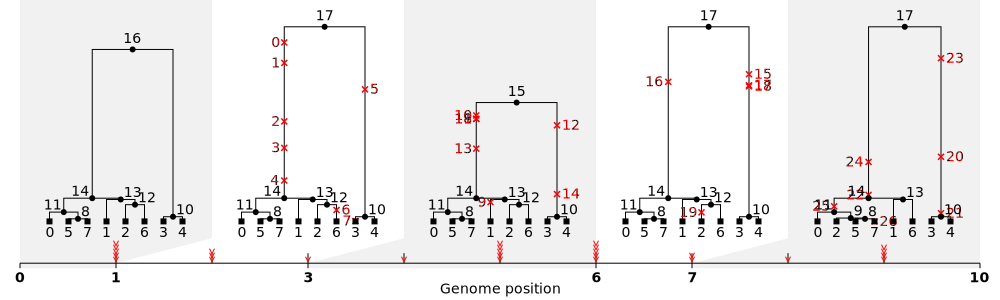

In [5]:
ts = msprime.sim_ancestry(samples=4, recombination_rate=0.2, sequence_length=10, random_seed=1)
ts = msprime.sim_mutations(ts, rate=.5, random_seed=1)
ts.dump(SAVE_PATH / 'case3.tree')
display.display(display.Markdown('## Case 3'))
ts.draw_svg(size=(1000, 300))

## Case 4

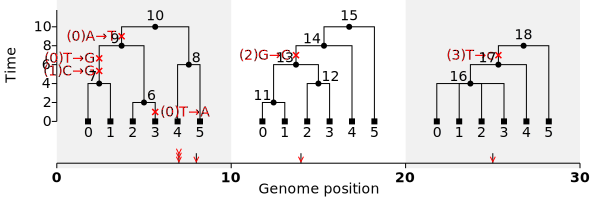

In [14]:
nodes = """\
is_sample time
1         0
1         0
1         0
1         0
1         0
1         0
0         2
0         4
0         6
0         8
0         10
0         2
0         4
0         6
0         8
0         10
0         4
0         6
0         8
"""

edges = """\
left right parent child
0    10    6      2,3
0    10    7      0,1
0    10    8      4,5
0    10    9      6,7
0    10    10     9,8
10   20    11     0,1
10   20    12     2,3
10   20    13     11,12
10   20    14     4,13
10   20    15     5,14
20   30    16     0,1,2,3
20   30    17     4,16
20   30    18     5,17
"""

sites = """\
position ancestral_state
7        A
8        C
14       G
25       T
"""

# TODO: should mut 2 on site 0 be child of mut 0 or mut 1 ?!?!?!?!?
mutations = """\
site node parent derived_state
0    9    -1     T
0    7    0      G
0    3    0      A
1    7    -1     G
2    13   -1     C
3    17   -1     c
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case4.tree')
display.display(display.Markdown('## Case 4'))
ts.draw_svg(
    y_axis=True,
    mutation_labels=mut_labels
)